In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


student_data = r"C:\Users\MK\Desktop\task\task\student_data.csv"
df_student = pd.read_csv(student_data)
print(df_student.shape)
print(df_student.head())
print(df_student.isnull().sum())

(8824678, 14)
   sessionId  timestamp      x      y       z   ppgValue  hr  hrIbi  hrStatus  \
0          1          8  653.0  195.0  4324.0  1917829.0 NaN    NaN       NaN   
1          1         50  659.0  198.0  4096.0  1917495.0 NaN    NaN       NaN   
2          1         89  645.0  149.0  4054.0  1917365.0 NaN    NaN       NaN   
3          1        128  752.0  213.0  4090.0  1918146.0 NaN    NaN       NaN   
4          1        169  652.0  232.0  4088.0  1919319.0 NaN    NaN       NaN   

   ibiStatus  notification  engagement affect context  
0        NaN           NaN         NaN    NaN     NaN  
1        NaN           NaN         NaN    NaN     NaN  
2        NaN           NaN         NaN    NaN     NaN  
3        NaN           NaN         NaN    NaN     NaN  
4        NaN           NaN         NaN    NaN     NaN  
sessionId             0
timestamp             0
x                338892
y                338892
z                338892
ppgValue         338892
hr              848

In [50]:
# 假设您的 DataFrame 变量名为 df
hr_status_counts = df_student['hrStatus'].value_counts()

# 显示 hrStatus 列中 0 和 1 的数量
#print("hrStatus 列中 0 的数量:", hr_status_counts[0])
#print("hrStatus 列中 1 的数量:", hr_status_counts[1])


In [51]:
student_skeleton = r"C:\Users\MK\Desktop\task\task\student_skeleton.csv"
df_student_skeleton = pd.read_csv(student_skeleton)
#print(df_student_skeleton.shape)
#print(df_student_skeleton.head())
#print(df_student_skeleton.isnull().sum())

In [70]:
session_info = r"C:\Users\MK\Desktop\task\task\session_info.csv"
df_session_info = pd.read_csv(session_info)
# print(df_session_info.shape)
print(df_session_info.head())
# print(df_session_info.isnull().sum())

   id  duration watchId    age  gender  fairNumber
0   1   8021351    0Q3V  18-25  female           1
1   2   3752526    0Q3V  26-30    male           1
2   3   3989497    0QED  18-25    male           1
3   4   4979198    0QED  18-25    male           1
4   5   4836199    0QVM  18-25    male           1


In [53]:
col_names = df_student.columns
col_names

Index(['sessionId', 'timestamp', 'x', 'y', 'z', 'ppgValue', 'hr', 'hrIbi',
       'hrStatus', 'ibiStatus', 'notification', 'engagement', 'affect',
       'context'],
      dtype='object')

In [54]:
affect_info = df_student["affect"].value_counts()

print("affect 列的信息:")
print(affect_info)

context_info = df_student["context"].value_counts()

print("context 列的信息:")
print(context_info)

affect 列的信息:
HAPPY      114
RELAXED    112
SAD          9
ANGRY        5
Name: affect, dtype: int64
context 列的信息:
CONVERSATION    85
OTHER           66
WALKING         48
VIEW_BOOTH      34
Name: context, dtype: int64


In [55]:
affect_dummies = pd.get_dummies(df_student['affect'], prefix='affect')

# 对 context 列进行独热编码
context_dummies = pd.get_dummies(df_student['context'], prefix='context')
df_encoded = pd.concat([df_student, affect_dummies, context_dummies], axis=1)

# 删除原始的 affect 和 context 列
df_encoded.drop(['affect', 'context'], axis=1, inplace=True)

# 显示编码后的数据
print(df_encoded.head())

   sessionId  timestamp      x      y       z   ppgValue  hr  hrIbi  hrStatus  \
0          1          8  653.0  195.0  4324.0  1917829.0 NaN    NaN       NaN   
1          1         50  659.0  198.0  4096.0  1917495.0 NaN    NaN       NaN   
2          1         89  645.0  149.0  4054.0  1917365.0 NaN    NaN       NaN   
3          1        128  752.0  213.0  4090.0  1918146.0 NaN    NaN       NaN   
4          1        169  652.0  232.0  4088.0  1919319.0 NaN    NaN       NaN   

   ibiStatus  notification  engagement  affect_ANGRY  affect_HAPPY  \
0        NaN           NaN         NaN             0             0   
1        NaN           NaN         NaN             0             0   
2        NaN           NaN         NaN             0             0   
3        NaN           NaN         NaN             0             0   
4        NaN           NaN         NaN             0             0   

   affect_RELAXED  affect_SAD  context_CONVERSATION  context_OTHER  \
0               0     

In [56]:
df_student['x'] = df_student['x'].interpolate()
df_student['y'] = df_student['y'].interpolate()
df_student['z'] = df_student['z'].interpolate()
df_student['ppgValue'] = df_student['ppgValue'].interpolate()

In [57]:
df_student

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824673,48,4225425,-879.0,-52.0,3786.5,3355035.5,0.0,0.0,-10.0,0.0,NaN,NaN,NaN,NaN
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8824675,48,4225495,-792.0,-89.0,3885.0,3404833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8824676,48,4225535,-806.0,-78.0,4130.0,3316474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
print(df_student.isnull().sum())
print(df_student.shape)

sessionId             0
timestamp             0
x                     0
y                     0
z                     0
ppgValue              0
hr              8487003
hrIbi           8487003
hrStatus        8487003
ibiStatus       8487003
notification    8824306
engagement      8824306
affect          8824438
context         8824445
dtype: int64
(8824678, 14)


In [59]:
# 使用布尔索引过滤出 hrStatus 列小于零的行，并删除这些行
filtered_df = df_student[df_student['hrStatus'] >= 0]

# 显示过滤后的 DataFrame
#print(filtered_df)
filtered_df.shape

(197906, 14)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 提取特征和目标变量
X = filtered_df[['ppgValue']]
y = filtered_df['hr']

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算均方根误差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# 输出模型参数
print("模型系数:", model.coef_)
print("模型截距:", model.intercept_)


RMSE: 13.838226299066996
模型系数: [1.16118504e-05]
模型截距: 56.65001508288843


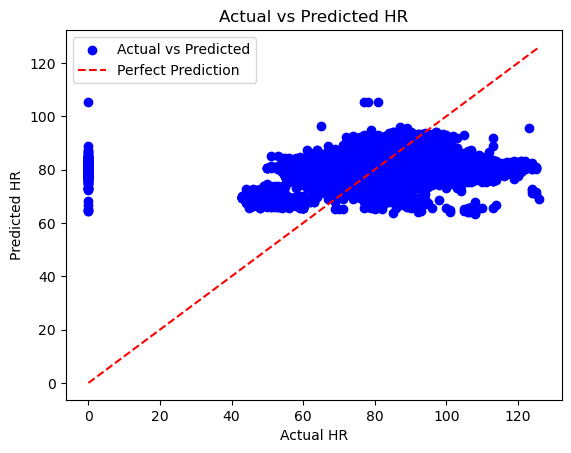

In [62]:
import matplotlib.pyplot as plt

# 绘制实际值和预测值的散点图
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# 添加标签和标题
plt.xlabel('Actual HR')
plt.ylabel('Predicted HR')
plt.title('Actual vs Predicted HR')

# 绘制对角线
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# 添加图例
plt.legend()

# 显示图表
plt.show()


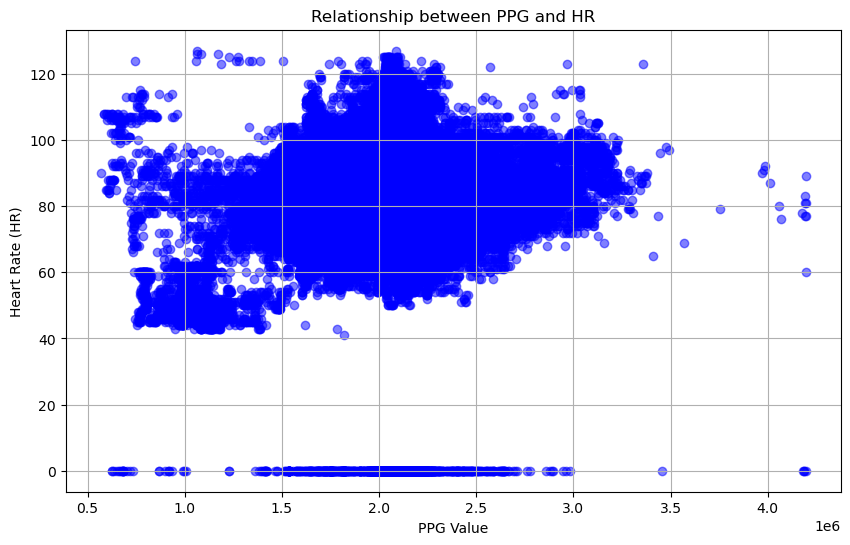

In [63]:
import matplotlib.pyplot as plt

# 绘制原始数据的关系图
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['ppgValue'], filtered_df['hr'], color='blue', alpha=0.5)
plt.title('Relationship between PPG and HR')
plt.xlabel('PPG Value')
plt.ylabel('Heart Rate (HR)')
plt.grid(True)
plt.show()


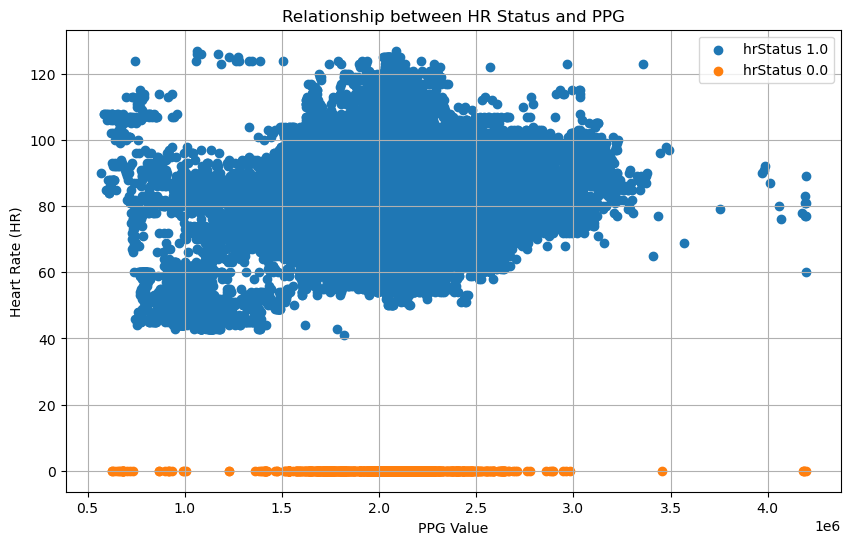

In [65]:
import matplotlib.pyplot as plt

# 获取不同 hrStatus 的唯一值
hr_statuses = filtered_df['hrStatus'].unique()

# 创建子图
fig, ax = plt.subplots(figsize=(10, 6))

# 遍历不同 hrStatus，并绘制对应的散点图
for status in hr_statuses:
    subset_df = filtered_df[filtered_df['hrStatus'] == status]
    ax.scatter(subset_df['ppgValue'], subset_df['hr'], label=f'hrStatus {status}')

# 添加标题和标签
ax.set_title('Relationship between HR Status and PPG')
ax.set_xlabel('PPG Value')
ax.set_ylabel('Heart Rate (HR)')
ax.legend()
ax.grid(True)

# 显示图表
plt.show()


In [71]:
# 将列名从 "id" 更改为 "sessionId"
df_session_info.rename(columns={'id': 'sessionId'}, inplace=True)


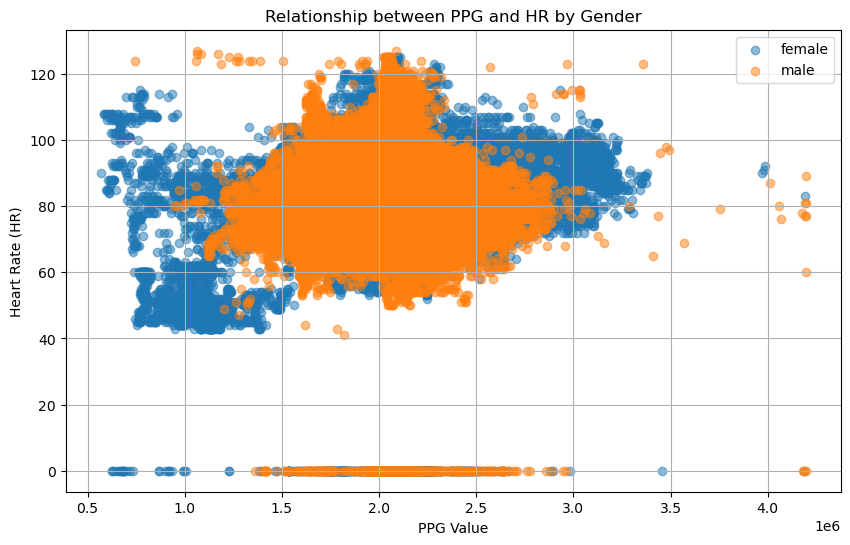

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 合并两个 DataFrame，假设使用 sessionId 作为键进行合并
merged_df = pd.merge(filtered_df, df_session_info, on='sessionId')

# 根据性别分组
grouped_gender = merged_df.groupby('gender')

# 创建子图
fig, ax = plt.subplots(figsize=(10, 6))

# 遍历不同性别，并绘制对应的散点图
for gender, data in grouped_gender:
    ax.scatter(data['ppgValue'], data['hr'], label=gender, alpha=0.5)

# 添加标题和标签
ax.set_title('Relationship between PPG and HR by Gender')
ax.set_xlabel('PPG Value')
ax.set_ylabel('Heart Rate (HR)')
ax.legend()
ax.grid(True)

# 显示图表
plt.show()


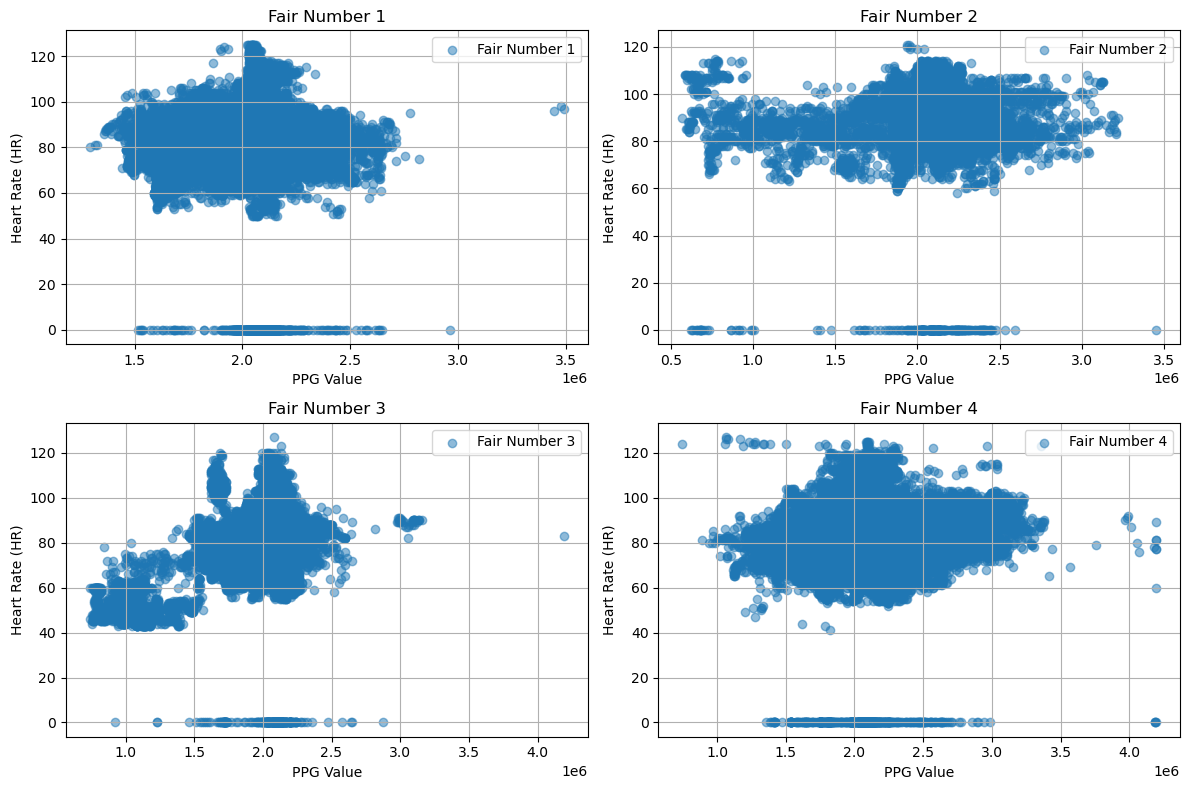

In [75]:

grouped_fairNumber = merged_df.groupby('fairNumber')

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 遍历不同的 fairNumber，并绘制对应的散点图
for fair_number, ax in zip(grouped_fairNumber.groups.keys(), axs.flatten()):
    data = grouped_fairNumber.get_group(fair_number)
    ax.scatter(data['ppgValue'], data['hr'], label=f'Fair Number {fair_number}', alpha=0.5)
    ax.set_title(f'Fair Number {fair_number}')
    ax.set_xlabel('PPG Value')
    ax.set_ylabel('Heart Rate (HR)')
    ax.legend()
    ax.grid(True)

# 调整子图布局
plt.tight_layout()

# 显示图表
plt.show()


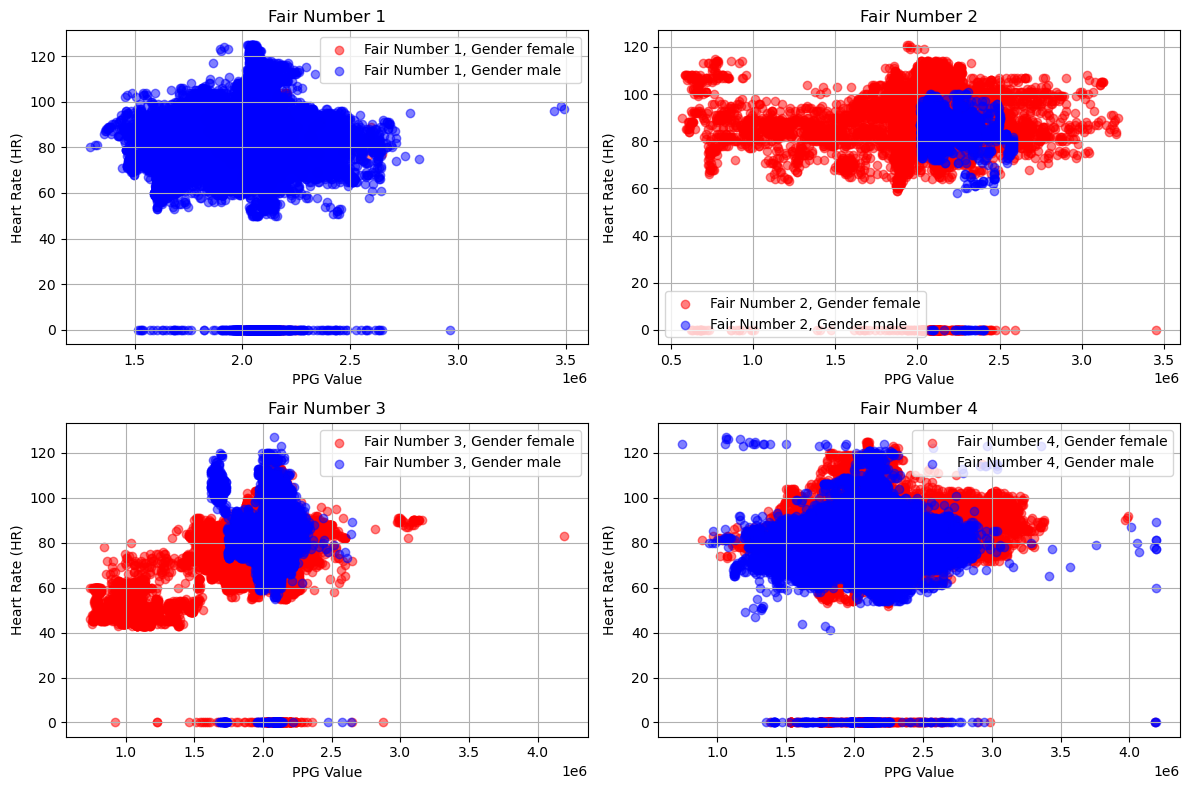

In [82]:
import matplotlib.pyplot as plt

# 根据 fairNumber 和 gender 分组
grouped_mix = merged_df.groupby(['fairNumber', 'gender'])

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# 定义颜色映射
colors = {'male': 'blue', 'female': 'red'}

# 遍历不同的 fairNumber，并绘制对应的散点图
for fair_number, ax in zip(range(1, 5), axs):
    for (fair, gender), data in grouped_mix:
        if fair == fair_number:
            ax.scatter(data['ppgValue'], data['hr'], label=f'Fair Number {fair}, Gender {gender}', color=colors[gender], alpha=0.5)
            ax.set_title(f'Fair Number {fair_number}')
            ax.set_xlabel('PPG Value')
            ax.set_ylabel('Heart Rate (HR)')
            ax.legend()
            ax.grid(True)

# 调整子图布局
plt.tight_layout()

# 显示图表
plt.show()
